### Importing libraries for manipulations and visualizations, the data set are in two csv files where they need to be studied first and later can be merged

In [1]:
# Importing necessary libraries for manipulation and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# There are two datasets related to each other by only Order ID and I am importing that

details = pd.read_csv('/Users/raghunandanms/Downloads/archive/Details.csv')
orders = pd.read_csv('/Users/raghunandanms/Downloads/archive/Orders.csv')
details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [3]:
orders.head()

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore


In [4]:
details.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64

In [5]:
orders.isnull().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64

### Thankfully no missing values

In [6]:
print("Shape of Details Table is:",details.shape)
print("Shape of Orders Table is:", orders.shape)

Shape of Details Table is: (1500, 7)
Shape of Orders Table is: (500, 5)


### As one can see the number of rows and columns are different in both data sets

In [7]:
# Just like SQL, using inner join because the same order IDs shall be merged

df = pd.merge(details, orders, on='Order ID', how='inner')
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City
0,B-25681,1096,658,7,Electronics,Electronic Games,COD,04-06-2018,Bhawna,Madhya Pradesh,Indore
1,B-26055,5729,64,14,Furniture,Chairs,EMI,10-03-2018,Harivansh,Uttar Pradesh,Mathura
2,B-25955,2927,146,8,Furniture,Bookcases,EMI,16-01-2018,Shiva,Maharashtra,Pune
3,B-26093,2847,712,8,Electronics,Printers,Credit Card,27-03-2018,Sarita,Maharashtra,Pune
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card,01-04-2018,Vrinda,Maharashtra,Pune


In [8]:
# Checking the data types

df.dtypes

Order ID        object
Amount           int64
Profit           int64
Quantity         int64
Category        object
Sub-Category    object
PaymentMode     object
Order Date      object
CustomerName    object
State           object
City            object
dtype: object

In [9]:
# To make the date from object to Data data type, however in this case when I looked into the df, I got to know the day was first and hence it was not allowing me to convert without saying dayfirst as True!

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

## Starting visualization from here!

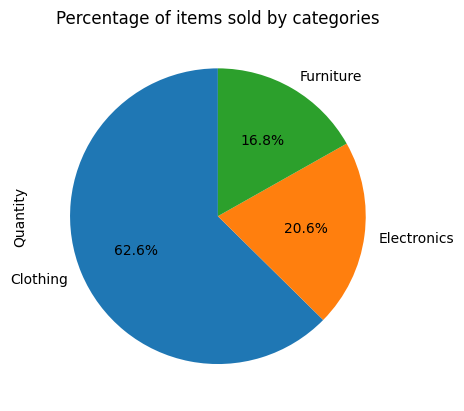

In [10]:
# Let me check what category of items are sold and how much percentage are they being sold.

df.groupby('Category')['Quantity'].sum().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title("Percentage of items sold by categories")
plt.show()

### From the above pie chart we can see that clothing category has largest sales happening by 62% and furniture being least

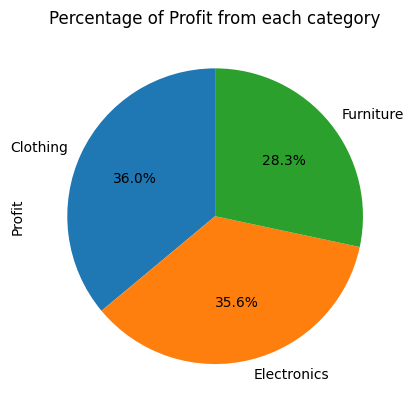

In [11]:
# Profit percentage

df.groupby('Category')['Profit'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Profit from each category')
plt.show()

### Since clothing is making huge sales from the above, the profit seems to be up for it, though the electronics profit is also amazingly great considering that it was sold by only 20%

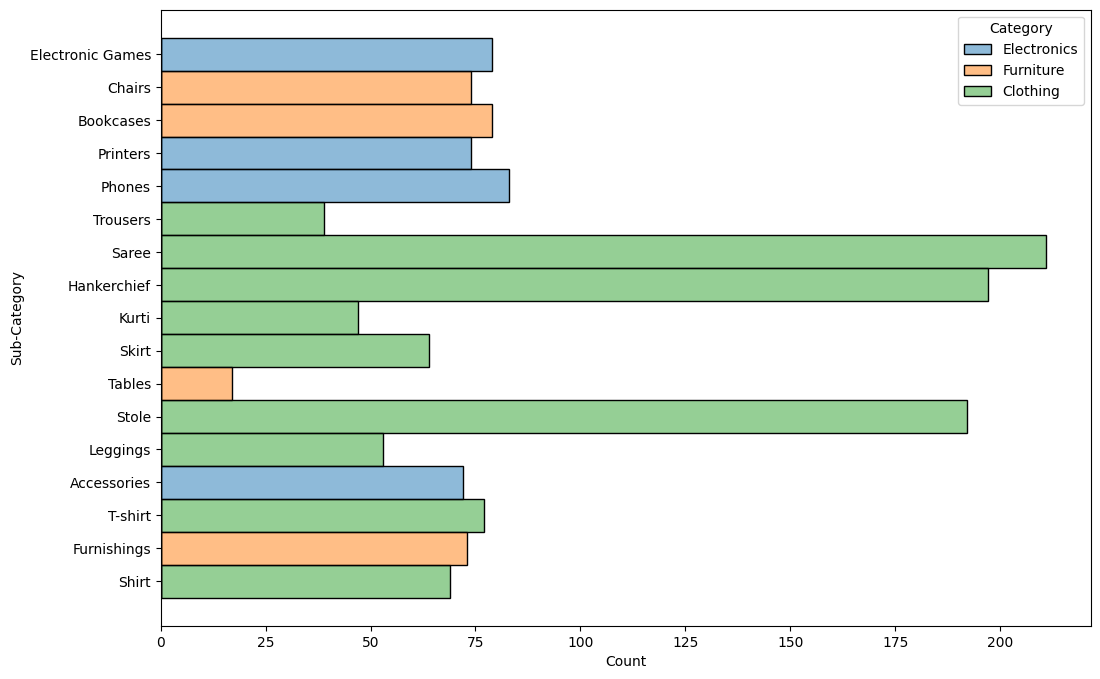

In [12]:
# Plotting to check which category is making more number of orders based on counts

plt.figure(figsize=(12,8))
sns.histplot(data=df, y='Sub-Category', hue='Category')
plt.show()

### Some of the key points here are:
### 1. Saree in clothing category is sold a lot or purchased a lot followed by handkerchief and stole
### 2. Phones in electronics are sold relatively larger in the same category followed by electonic games
### 3. In furniture department, Bookcases are in demand, followed by chairs and furnishings

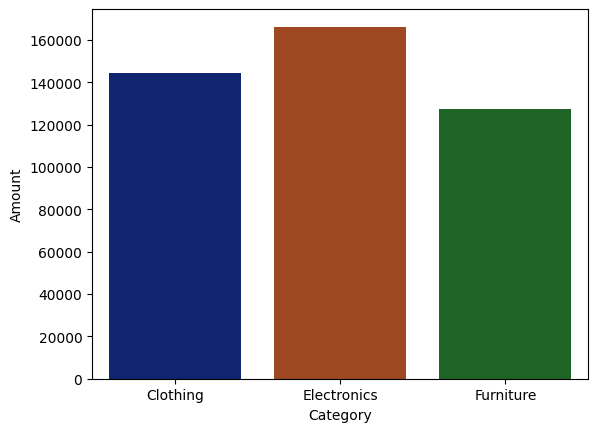

In [13]:
# Based on amount generated we are plotting the categories

sales = df.groupby('Category')['Amount'].sum().reset_index()
sns.barplot(x='Category', y='Amount', data = sales, palette='dark')
plt.show()

### Based on the above chart one can see that electronics department or category is actually making a lot sales and earning money, followed by clothing and furniture

In [14]:
# Looking at the sub category Electronics

elec = df[df['Category']=='Electronics']
elec.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City
0,B-25681,1096,658,7,Electronics,Electronic Games,COD,2018-06-04,Bhawna,Madhya Pradesh,Indore
3,B-26093,2847,712,8,Electronics,Printers,Credit Card,2018-03-27,Sarita,Maharashtra,Pune
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card,2018-04-01,Vrinda,Maharashtra,Pune
11,B-25887,2125,-234,6,Electronics,Printers,EMI,2018-12-01,Vishakha,Uttar Pradesh,Prayagraj
12,B-25923,3873,-891,6,Electronics,Phones,Credit Card,2018-12-27,Gopal,Maharashtra,Mumbai


In [15]:
# Sum aggregating based on sub categories

sub = elec.groupby('Sub-Category')['Amount'].sum()
sub

Sub-Category
Accessories         21728
Electronic Games    39168
Phones              46119
Printers            59252
Name: Amount, dtype: int64

In [16]:
sold_sub = sub.sort_values()

In [17]:
sold_sub

Sub-Category
Accessories         21728
Electronic Games    39168
Phones              46119
Printers            59252
Name: Amount, dtype: int64

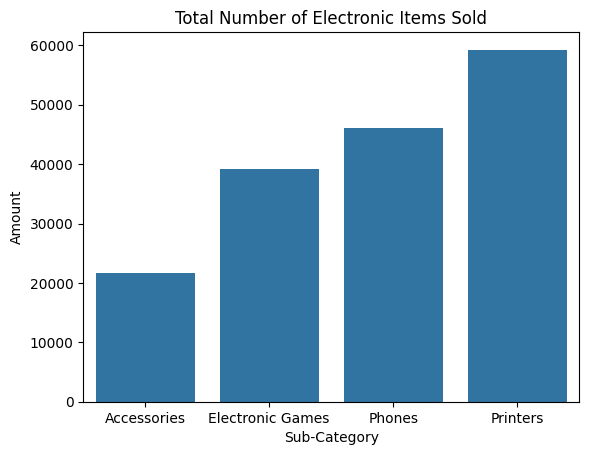

In [18]:
# Sub categories been plotted based on aggregated amount

sns.barplot(data=sold_sub)
plt.title('Total Number of Electronic Items Sold')
plt.show()

### Printers are generating high revenue at the Electronic category

In [19]:
city = df.groupby('City')['Amount'].sum().sort_values(ascending=False).head(20)

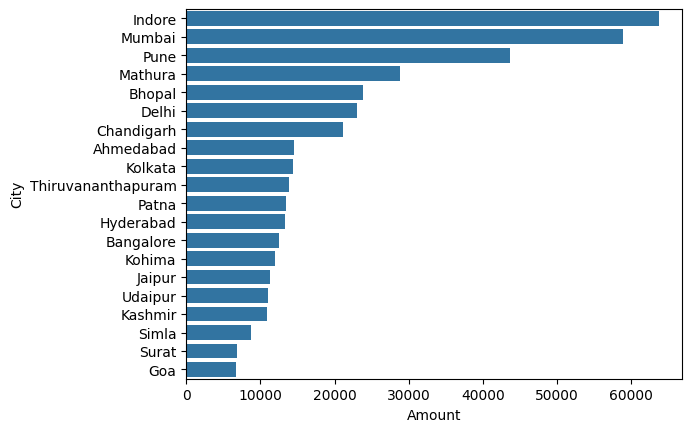

In [20]:
# City wise

sns.barplot(data=city, orient='h')
plt.show()

### City Indore is making more money than the rest, followed by Mumbai

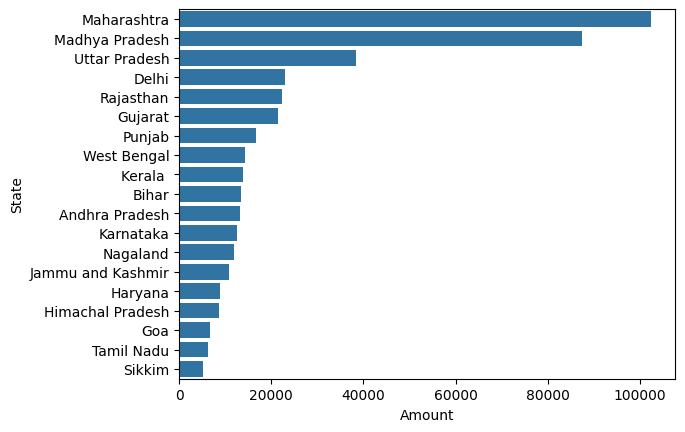

In [21]:
# State wise

state = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(20)
sns.barplot(data=state, orient='h')
plt.show()

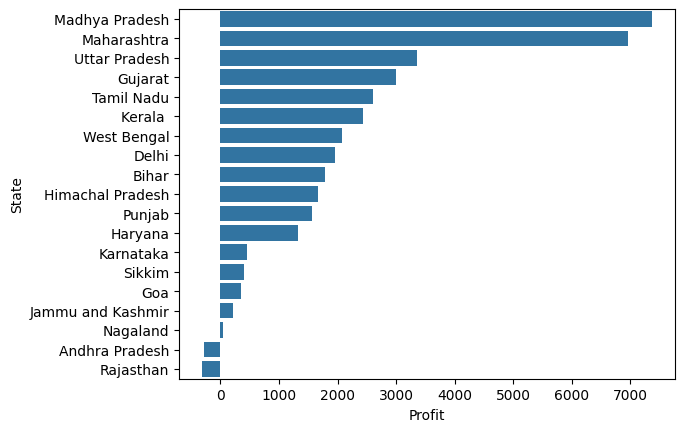

In [22]:
# State wise profit

state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(20)
sns.barplot(data=state_profit,orient='h')
plt.show()

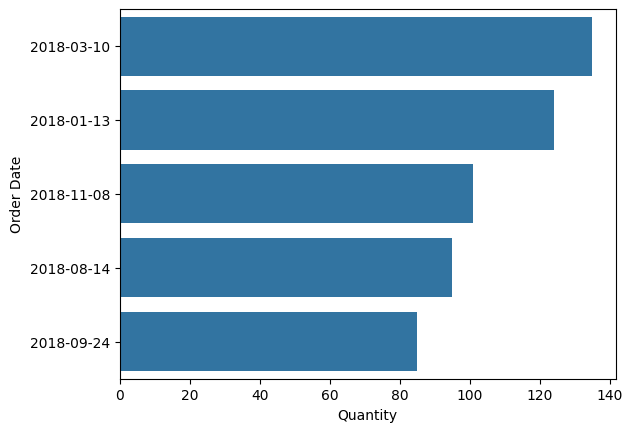

In [23]:
# Datewise most sold quantities

month_wise = df.groupby('Order Date')['Quantity'].sum().sort_values(ascending=False).head()
sns.barplot(data=month_wise, orient='h')
plt.show()

In [24]:
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df['Week'] = df['Order Date'].dt.dayofweek

In [25]:
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Month,Year,Week
0,B-25681,1096,658,7,Electronics,Electronic Games,COD,2018-06-04,Bhawna,Madhya Pradesh,Indore,6,2018,0
1,B-26055,5729,64,14,Furniture,Chairs,EMI,2018-03-10,Harivansh,Uttar Pradesh,Mathura,3,2018,5
2,B-25955,2927,146,8,Furniture,Bookcases,EMI,2018-01-16,Shiva,Maharashtra,Pune,1,2018,1
3,B-26093,2847,712,8,Electronics,Printers,Credit Card,2018-03-27,Sarita,Maharashtra,Pune,3,2018,1
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card,2018-04-01,Vrinda,Maharashtra,Pune,4,2018,6


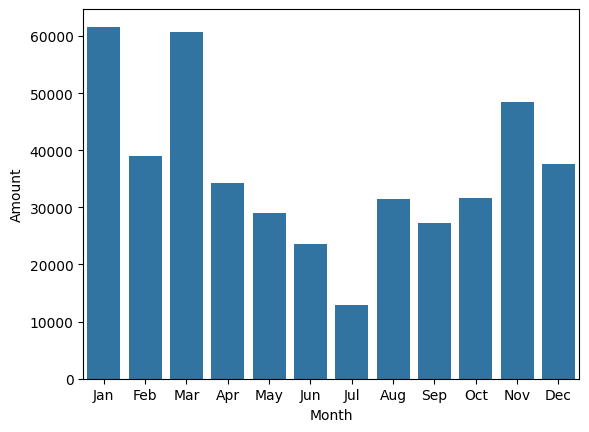

In [26]:
# Monthly sales

monthly_sales = df.groupby('Month')['Amount'].sum()
sns.barplot(data=monthly_sales)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### January and March are the months where amount is being generated by selling items

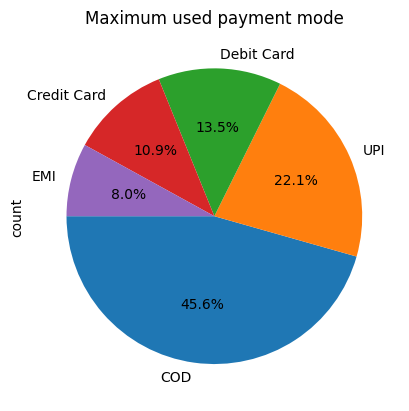

In [27]:
df['PaymentMode'].value_counts(ascending=False).plot(kind='pie', autopct='%1.1f%%', startangle=180)
plt.title('Maximum used payment mode')
plt.show()

### Based on the above pie chart I can say that nearly 46% of mode of payment is Cash-on-delivery while EMI being least. UPI holds 2nd place followed by Debit and Credit cards.

In [28]:
phones = df[df['Sub-Category'] == 'Phones']
phones

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Month,Year,Week
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card,2018-04-01,Vrinda,Maharashtra,Pune,4,2018,6
12,B-25923,3873,-891,6,Electronics,Phones,Credit Card,2018-12-27,Gopal,Maharashtra,Mumbai,12,2018,3
25,B-25830,1954,782,3,Electronics,Phones,Credit Card,2018-10-26,Aastha,Himachal Pradesh,Simla,10,2018,4
32,B-26022,1824,1303,8,Electronics,Phones,Credit Card,2018-02-18,Shrichand,Punjab,Chandigarh,2,2018,6
42,B-25681,1625,-77,3,Electronics,Phones,EMI,2018-06-04,Bhawna,Madhya Pradesh,Indore,6,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,B-25630,143,-129,2,Electronics,Phones,COD,2018-04-24,Sahil,Punjab,Chandigarh,4,2018,1
1408,B-25633,249,-130,4,Electronics,Phones,UPI,2018-04-26,Amit,Sikkim,Gangtok,4,2018,3
1433,B-25639,1629,-153,3,Electronics,Phones,COD,2018-04-27,Lisha,Madhya Pradesh,Bhopal,4,2018,4
1438,B-25919,977,-244,7,Electronics,Phones,COD,2018-12-23,Neha,Rajasthan,Udaipur,12,2018,6


In [29]:
phones['PaymentMode'].value_counts()

PaymentMode
COD            36
Debit Card     14
UPI            13
Credit Card    10
EMI            10
Name: count, dtype: int64

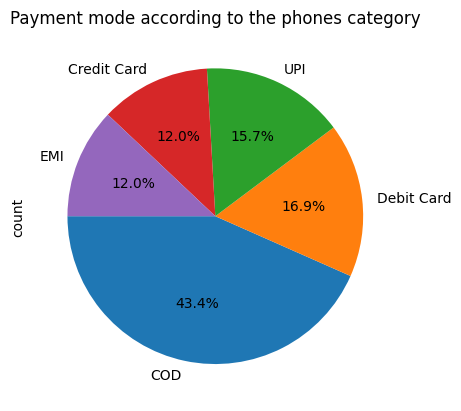

In [30]:
phones['PaymentMode'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=180)
plt.title('Payment mode according to the phones category')
plt.show()

# BY RMS